In [1]:
'''THIS NOTEBOOK ALLOWS YOU TO PLOT MAIN AND EXTENDED DATA FIGURES THAT RELATE TO OUR BEHAVIOURAL RESULTS'''
%load_ext autoreload
%autoreload 2

from functions import functions_behaviour as fun_beh
from functions import functions_behaviour_rec as fun_beh_rec
from functions import data_import_ephys as dimp
from functions import data_import as di_beh

def load_behaviour(path):
    'Behavioural training data loading function.'
    exp = di_beh.Experiment(path+'training/')
    return exp

def load_behaviour_rec(path):
    'Behavioural data during recordings loading function.'
    animals = ['/m484', '/m479', '/m483', '/m478', '/m486', '/m480', '/m481'] 
    exp_record = []
    for an in animals:
        path_animal = path + 'data_recordings/behaviour' + an
        print(path_animal)
        exp_record.append(dimp.Experiment(path_animal))
    return exp_record


In [2]:
your_path_to_data = 'data_share/'

'''Edit your path to the data folder above and import behavioural data here. 
  exp_train will output behavioural data during the training phase.
  exp_rec will output data during the recording phase.'''

exp_train = load_behaviour(your_path_to_data); exp_rec = load_behaviour_rec(your_path_to_data) 


Loading new data files..
data_share/data_recordings/behaviour/m484
Loading new data files..
data_share/data_recordings/behaviour/m479
Loading new data files..
data_share/data_recordings/behaviour/m483
Loading new data files..
data_share/data_recordings/behaviour/m478
Loading new data files..
data_share/data_recordings/behaviour/m486
Loading new data files..
data_share/data_recordings/behaviour/m480
Loading new data files..
Unable to import file: m480-2018-08-16-141547.txt
0
data_share/data_recordings/behaviour/m481
Loading new data files..


In [36]:
exp_rec[0].session[0].n_trials

AttributeError: 'Experiment' object has no attribute 'session'

In [4]:
lens = [s.trial_data['n_trials'] for s in exp_train.sessions]
print(np.mean(lens), np.median(lens))

lens = [s.trial_data['n_trials'] for s in exp_rec[0].sessions]
print(lens)
print(np.mean(lens), np.median(lens))

NameError: name 'np' is not defined

In [ ]:
''' Fig 1D - plotting the last training session for one of the animals. 
    Can plot any session by changing the indexing variable below.'''

last_session = -2
fun_beh.session_plot_moving_average(exp_rec[0].sessions[last_session]) 

In [ ]:
'''Fig 1E - plotting the average number of trials after a reversal taken to reach the threshold to trigger the next 
   reversal, as a function of problem number;
   
   Extended Figure 1A -  number of trials following a reversal taken to reach the threshold to trigger 
   the next reversal, as a function of reversal number within each problem and problem number.'''

fun_beh.trials_till_reversal_plot(exp_train)


In [ ]:
'''Fig 1F - Probability of choosing the new best option (the choice that becomes good after the reversal)
   on the last ten trials before the reversal and the first ten trials after the reversal split 
   by the first problem and the last problem. The P value refers to the difference between the 
   slopes after the reversal point in early and late training (paired-sample t-test, two-sided).'''

fun_beh.meta_learning_reversals(exp_train)

In [ ]:
'''Fig 1G - plotting the average number of pokes per trial to a choice port
   that was no longer available because the subject had already chosen the other port, as a function of problem number.
   
   Extended Figure 1b -  nnumber of pokes per trial to a choice port
   that was no longer available because the subject had already chosen the other port, as a function of problem number
   
   Fig 1H - Mean number of pokes per trial to a choice port that was no longer available as a function of reversal number
   on the first five problems and the last five problems during training.
   The P value refers to the difference in the log of the time constants from fitted exponential curves 
   in early and late training (paired-sample t-test, two-sided)
   
   Set first_task_only = True to exclude data from the first task.'''

fun_beh.out_of_sequence(exp_train, first_task_only = False)


/Users/jo/notebooks_paper/functions/functions_behaviour.py:568: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = np.round(res.anova_table['Pr > F'][0],2)
/Users/jo/notebooks_paper/functions/functions_behaviour.py:569: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(coef_names[c] + ' '+ 'df = '+ ' '+ str(res.anova_table['Num DF'][0]) + ' ' + str(res.anova_table['Den DF'][0]), 'F = ' + ' ' + str(np.round(res.anova_table['F Value'][0],3)),'p = ' + ' '+ str(np.round(res.anova_table['Pr > F'][0],3)));
/Users/jo/notebooks_paper/functions/functions_behaviour.py:568: FutureWarning: Series.__getitem__ treating keys a

Previous Choice: df =  9.0 71.0 F =  11.782 p =  0.0
History of Choices: df =  9.0 71.0 F =  0.668 p =  0.735
Previous Outcome x Choice: df =  9.0 71.0 F =  5.089 p =  0.0
History of Outcomes x Choices: df =  9.0 71.0 F =  5.464 p =  0.0


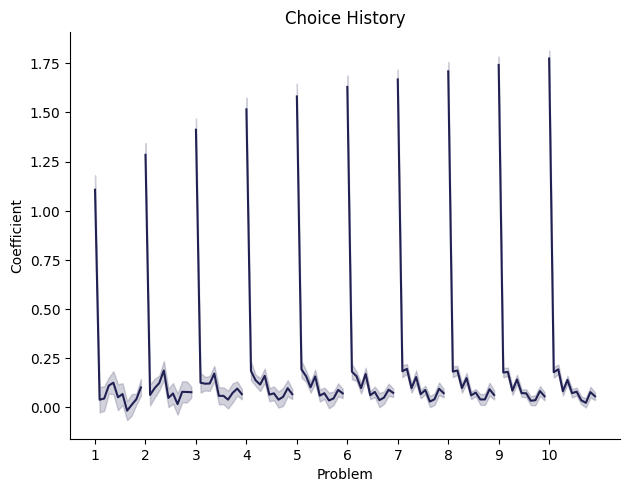

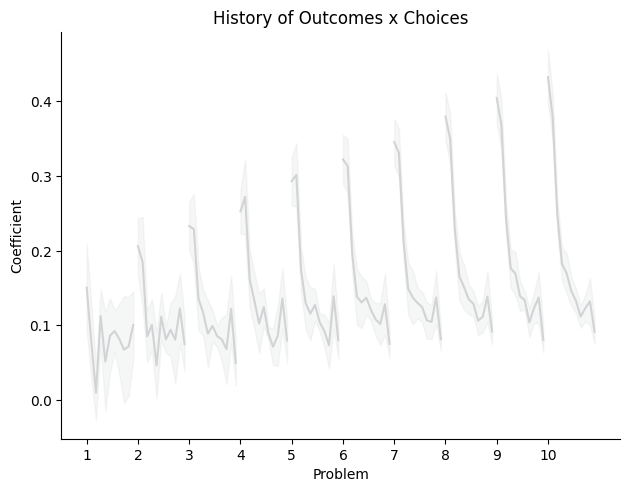

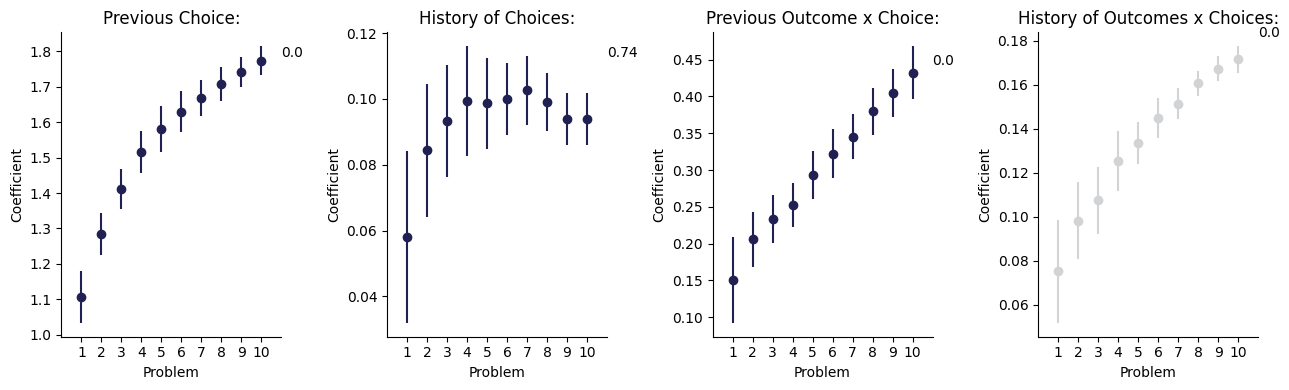

In [3]:
''' Fig 1I - J, Coefficients from a logistic regression predicting current choices using the history of previous choices (i), outcomes (not shown) and choice ×
outcome interactions (j). For each problem and predictor, the coefficients at lag 1–11 trials are plotted.'''

fun_beh.plot_policy_during_training(exp_train)


In [ ]:
'''Extended Figure 2A - C - plotting the average number of trials after a reversal taken to reach the threshold to trigger the next 
   reversal, as a function of problem number DURING THE RECORDING PHASE.'''

fun_beh_rec.trials_till_reversal_plot_recordings(exp_rec)


In [ ]:
'''Extended Figure 2D - F - plotting the average number of pokes per trial to a choice port
   that was no longer available because the subject had already chosen the other port, as a function of problem number
   DURING THE RECORDING PHASE.
   The function allows to plot either choices to only the other choice (only_A_B = True) in that task or
   any other port (only_A_B = False).'''

fun_beh_rec.out_of_sequence_recordings(exp_rec, only_A_B = True)


In [ ]:
''' Extended Figure 1I - J - Plotting forced A trials where A choice was illuminated but B choice was good
    (animals were as likely to first choose the B choice port (not illuminated but good port at the time) as the illuminated A port (t (7) = 0.76, p = .470) and were much more likely to choose the good B
    port than other ports (initiation and ports used in other problems).

    Plotting forced B trials where B choice was illuminated but A choice
    was good (animals were as likely to first choose the A choice port as the B port).'''

fun_beh_rec.plot_forced(exp_rec)

In [ ]:
exp.sessions[0].trial_data['n_trials']

In [92]:
import numpy as np
import scipy

n=5
a = np.arange(8)
b = scipy.linalg.toeplitz(a, np.zeros((1,n)))[n-1:-1] # find rewards on n-back trials
c = (a[n:]) # current choices need to start at nth trial

print(a)
print(b)
print(c[:,np.newaxis])

d = np.pad(c, [n,0], mode='constant', constant_values=0) # pad with zeros to match the length of b
print(d)

[0 1 2 3 4 5 6 7]
[[4. 3. 2. 1. 0.]
 [5. 4. 3. 2. 1.]
 [6. 5. 4. 3. 2.]]
[[5]
 [6]
 [7]]
[0 0 0 0 0 5 6 7]


In [224]:
import numpy as np
import scipy

exp = exp_rec[0]

X_sessions, y_sessions = [], []
n = 11 # this number was selected based on significance testing after training 
subject_IDs = exp.subject_IDs; n_subjects = len(subject_IDs); coef_subj = [] # list to store regression coefficients
print(subject_IDs, n_subjects)

for n_subj, subject_ID in enumerate(subject_IDs):
    subject_sessions = exp.get_sessions(subject_IDs=[subject_ID])
    results_task = [];  results_session = [] # regression coefficients for tasks and sessions    
    for j, session in enumerate(subject_sessions):
        choices = session.trial_data['choices']
        all_sessions = len(subject_sessions)-1 # to store last session
        configuration = session.trial_data['configuration_i'] 
        if j == 0:
            previous_session_config = configuration[0] # if first session find poke configuration 
            
        elif configuration[0]!= previous_session_config: # check if configuration changed in this session 
            previous_session_config = configuration[0]  
            results_task.append(np.mean(results_session,0)) # append results if configuration changed
            
        if len(choices) > n*3: # check there is enough trials for regression in that session
            reward = session.trial_data['outcomes'] # rewards
            previous_rewards = scipy.linalg.toeplitz(reward, np.zeros((1,n)))[n-1:-1] # find rewards on n-back trials
            previous_choices = scipy.linalg.toeplitz(choices, np.zeros((1,n)))[n-1:-1] # find choices on n-back trials
            interactions = scipy.linalg.toeplitz((((choices-0.5)*(reward-0.5))*2),np.zeros((1,n)))[n-1:-1] #interactions rewards x choice
            choices_current = (choices[n:]) # current choices need to start at nth trial
            ones = np.ones(len(interactions)).reshape(len(interactions),1) # add constant
            X = (np.hstack([previous_rewards,interactions,ones])) # create design matrix

            X_sessions.append(X)
            y_sessions.append(choices_current[:, np.newaxis])

            print(j, choices.shape, choices_current.shape, X.shape)

[484] 1
0 (513,) (502,) (502, 23)
1 (379,) (368,) (368, 23)
2 (504,) (493,) (493, 23)
3 (388,) (377,) (377, 23)
4 (506,) (495,) (495, 23)
5 (438,) (427,) (427, 23)
6 (652,) (641,) (641, 23)
7 (371,) (360,) (360, 23)
8 (590,) (579,) (579, 23)
9 (489,) (478,) (478, 23)
10 (377,) (366,) (366, 23)
11 (548,) (537,) (537, 23)
12 (564,) (553,) (553, 23)
13 (564,) (553,) (553, 23)
14 (499,) (488,) (488, 23)
15 (133,) (122,) (122, 23)
16 (403,) (392,) (392, 23)
17 (384,) (373,) (373, 23)
18 (746,) (735,) (735, 23)
19 (467,) (456,) (456, 23)
20 (483,) (472,) (472, 23)
21 (483,) (472,) (472, 23)
22 (92,) (81,) (81, 23)
23 (261,) (250,) (250, 23)
24 (518,) (507,) (507, 23)
25 (432,) (421,) (421, 23)
26 (278,) (267,) (267, 23)
27 (368,) (357,) (357, 23)
28 (503,) (492,) (492, 23)
29 (518,) (507,) (507, 23)
30 (569,) (558,) (558, 23)
31 (459,) (448,) (448, 23)
32 (556,) (545,) (545, 23)
33 (409,) (398,) (398, 23)
34 (757,) (746,) (746, 23)


/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = np.vstack(X_sessions)
Y = np.vstack(y_sessions)
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

(15816, 23)


In [226]:
model = LogisticRegression(fit_intercept = False) 
model.fit(X_train, Y_train) # fit logistic regression predicting current choice based on history of behaviour

# Evaluate the model
y_pred = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_pred)
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, y_pred)

model = LogisticRegression(fit_intercept = False) 
model.fit(X, Y) # fit logistic regression predicting current choice based on history of behaviour

/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(fit_intercept=False)

In [227]:
value_coef = model.coef_[0][-12:-1]
sticky_coef = model.coef_[0][-23:-12]

print(model.coef_[0])
print(value_coef)
print(sticky_coef)

[ 0.04810184  0.02167924  0.02220532  0.01165424  0.01356253  0.05454455
  0.03439504  0.06045917  0.04045821 -0.00388491  0.04522324  0.65172941
  0.64696304  0.54913722  0.44415804  0.43111879  0.33828505  0.3193116
  0.30239256  0.27655607  0.26649607  0.27589782 -0.21390901]
[0.65172941 0.64696304 0.54913722 0.44415804 0.43111879 0.33828505
 0.3193116  0.30239256 0.27655607 0.26649607 0.27589782]
[ 0.04810184  0.02167924  0.02220532  0.01165424  0.01356253  0.05454455
  0.03439504  0.06045917  0.04045821 -0.00388491  0.04522324]


In [228]:
y_pred_sessions = []; value_sessions = []; sticky_sessions = []; all_sessions = []

for x, y in zip(X_sessions, y_sessions):
    y_pred = model.predict(x)
    # print(x.shape, y.shape, y_pred.shape)
    print(accuracy_score(y, y_pred), accuracy_score(y[1:], y_pred[:-1]), accuracy_score(y[:-1], y_pred[1:]))

    value = np.matmul(x[:, -12:-1], value_coef)
    sticky = np.matmul(x[:, -23:-12], sticky_coef)
    all = np.matmul(x, model.coef_[0])

    y_pred_sessions.append(y_pred); value_sessions.append(value); sticky_sessions.append(sticky); all_sessions.append(all)


0.701195219123506 0.6926147704590818 0.6946107784431138
0.7309782608695652 0.7247956403269755 0.7356948228882834
0.6937119675456389 0.6890243902439024 0.6849593495934959
0.6976127320954907 0.7047872340425532 0.6728723404255319
0.6060606060606061 0.6052631578947368 0.597165991902834
0.6744730679156908 0.6666666666666666 0.6784037558685446
0.7737909516380655 0.7765625 0.7546875
0.7722222222222223 0.7493036211699164 0.7715877437325905
0.5958549222797928 0.5865051903114187 0.5916955017301038
0.6924686192468619 0.6939203354297694 0.6708595387840671
0.7021857923497268 0.6876712328767123 0.7123287671232876
0.7206703910614525 0.7182835820895522 0.7182835820895522
0.701627486437613 0.6757246376811594 0.6938405797101449
0.7215189873417721 0.7192028985507246 0.7264492753623188
0.7704918032786885 0.7700205338809035 0.7720739219712526
0.6967213114754098 0.6776859504132231 0.743801652892562
0.7066326530612245 0.6854219948849105 0.7084398976982097
0.7238605898123325 0.6989247311827957 0.7419354838709

In [229]:
def pad_and_crop(arr, forced_arr, n=11):
    y_pad = np.pad(np.copy(arr), [11,0], constant_values=0)
    y_del = np.delete(y_pad, forced_arr)
    return y_del

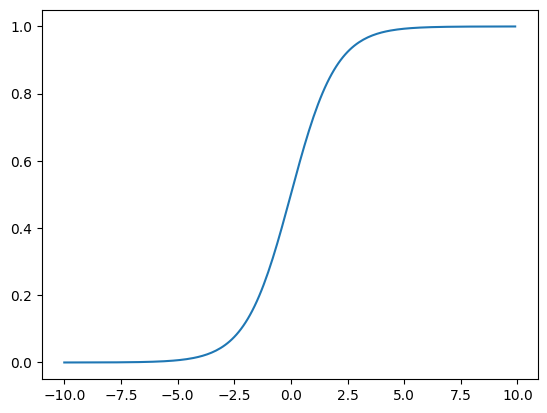

In [230]:
from scipy.stats import logistic
z = np.arange(-10,10,0.1)
f = logistic.cdf(z)

plt.plot(z, f)

NameError: name 'session' is not defined

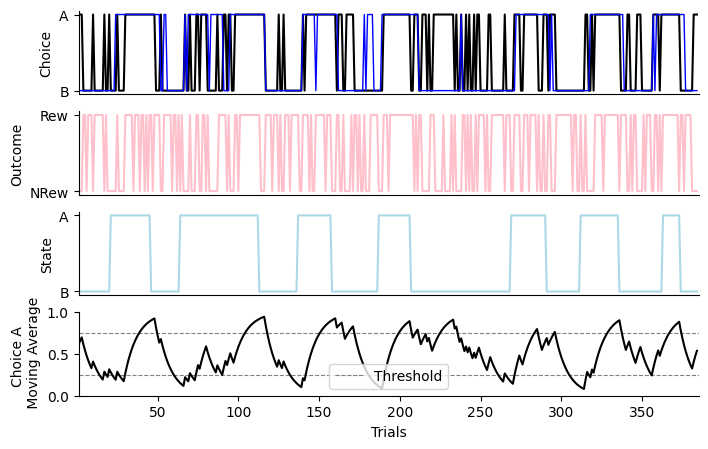

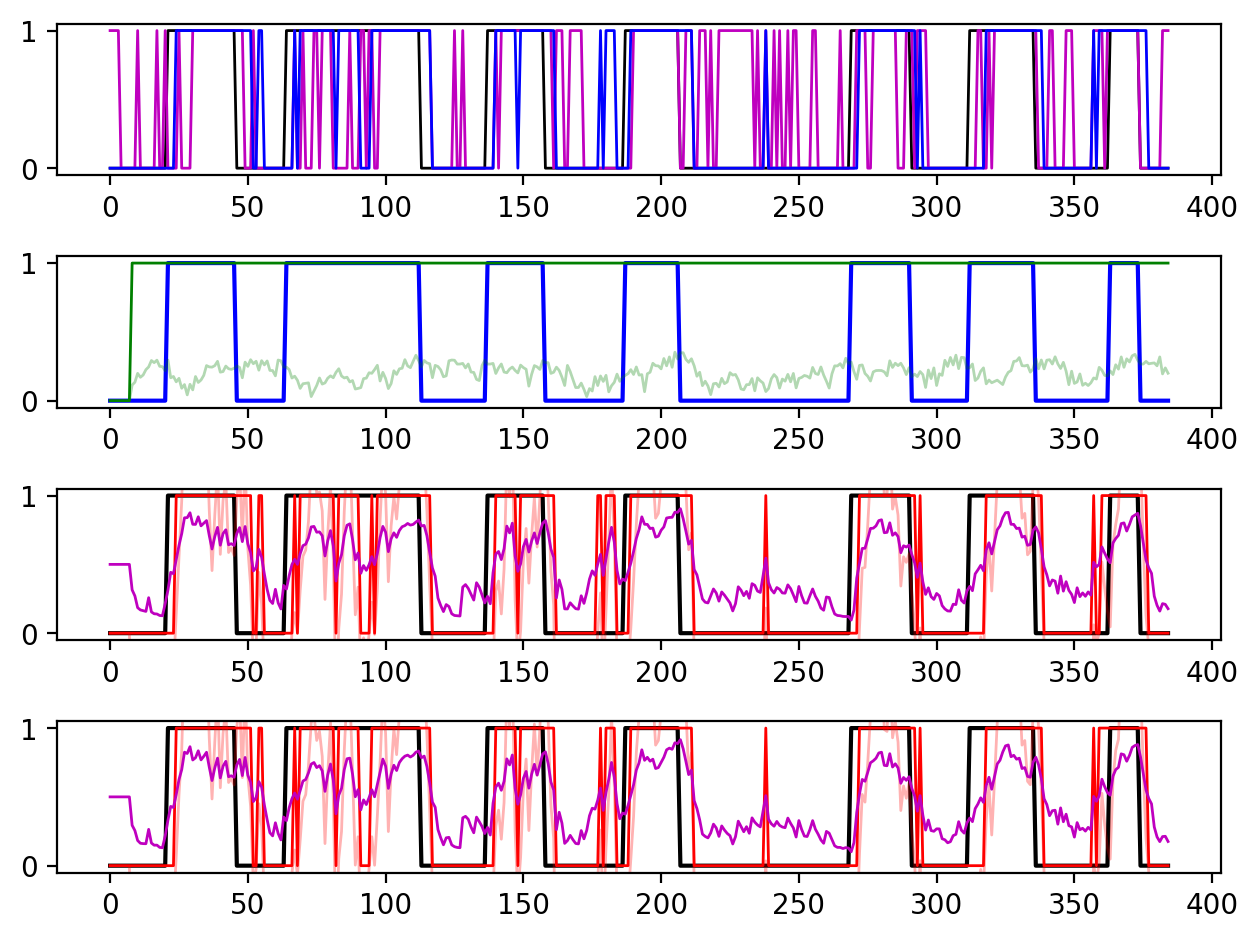

In [231]:
''' Fig 1D - plotting the last training session for one of the animals. 
    Can plot any session by changing the indexing variable below.'''
import matplotlib.pyplot as plt

sess_id = 0
session = exp_rec[0].sessions[sess_id]

fun_beh.session_plot_moving_average(session)

# plt.figure()
forced_trials = session.trial_data['forced_trial']
forced_array = np.where(forced_trials == 1)[0]

y_ = pad_and_crop(y_pred_sessions[sess_id], forced_array)
v = pad_and_crop(value_sessions[sess_id], forced_array)
s = pad_and_crop(sticky_sessions[sess_id], forced_array)
a = pad_and_crop(all_sessions[sess_id], forced_array)

state = session.trial_data['state']
state = np.delete(state, forced_array)
choice = session.trial_data['choices']
choice = np.delete(choice, forced_array)

plt.subplot(4,1,1); plt.plot(np.arange(len(y_)), y_, 'b', linewidth=1)


plt.figure(dpi=200)
plt.subplot(4,1,1); 
plt.plot(np.arange(len(s)), state, 'k', linewidth=1)
plt.plot(np.arange(len(s)), choice, 'm', linewidth=1)
plt.plot(np.arange(len(y_)), y_, 'b', linewidth=1)
plt.ylim([-0.05,1.05])

plt.subplot(4,1,2); 
plt.plot(np.arange(len(s)), state, 'blue')
plt.plot(np.arange(len(s)), s, 'g', linewidth=1, alpha=0.3)
plt.plot(np.arange(len(s)), np.maximum(0, np.sign(s)), 'g', linewidth=1)
plt.ylim([-0.05,1.05])

plt.subplot(4,1,3); 
plt.plot(np.arange(len(v)), state, 'k')
plt.plot(np.arange(len(v)), v, 'r', linewidth=1, alpha=0.3)
plt.plot(np.arange(len(v)), np.maximum(0, np.sign(v)), 'r', linewidth=1)
plt.plot(np.arange(len(v)), logistic.cdf(v), 'm', linewidth=1)
plt.ylim([-0.05,1.05])

plt.subplot(4,1,4); 
plt.plot(np.arange(len(a)), state, 'k')
plt.plot(np.arange(len(a)), a, 'r', linewidth=1, alpha=0.3)
plt.plot(np.arange(len(a)), np.maximum(0, np.sign(a)), 'r', linewidth=1)
plt.plot(np.arange(len(a)), logistic.cdf(a), 'm', linewidth=1)
plt.ylim([-0.05,1.05])

plt.tight_layout()

In [268]:
a = np.linspace(0,10,100, endpoint=False)
bin_edges = np.linspace(0, 10, 11)[1:]  # Creates 5 edges for 4 bins
print(bin_edges)
bins = np.digitize(a, bin_edges)
print(a)
print(bins)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]


39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
37 37 40
39 39 40
39 39 40
39 39 40
39 39 40
37 37 40
39 39 40
37 37 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
37 37 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
39 39 40
(40, 40)


/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


IndexError: index 40 is out of bounds for axis 1 with size 40

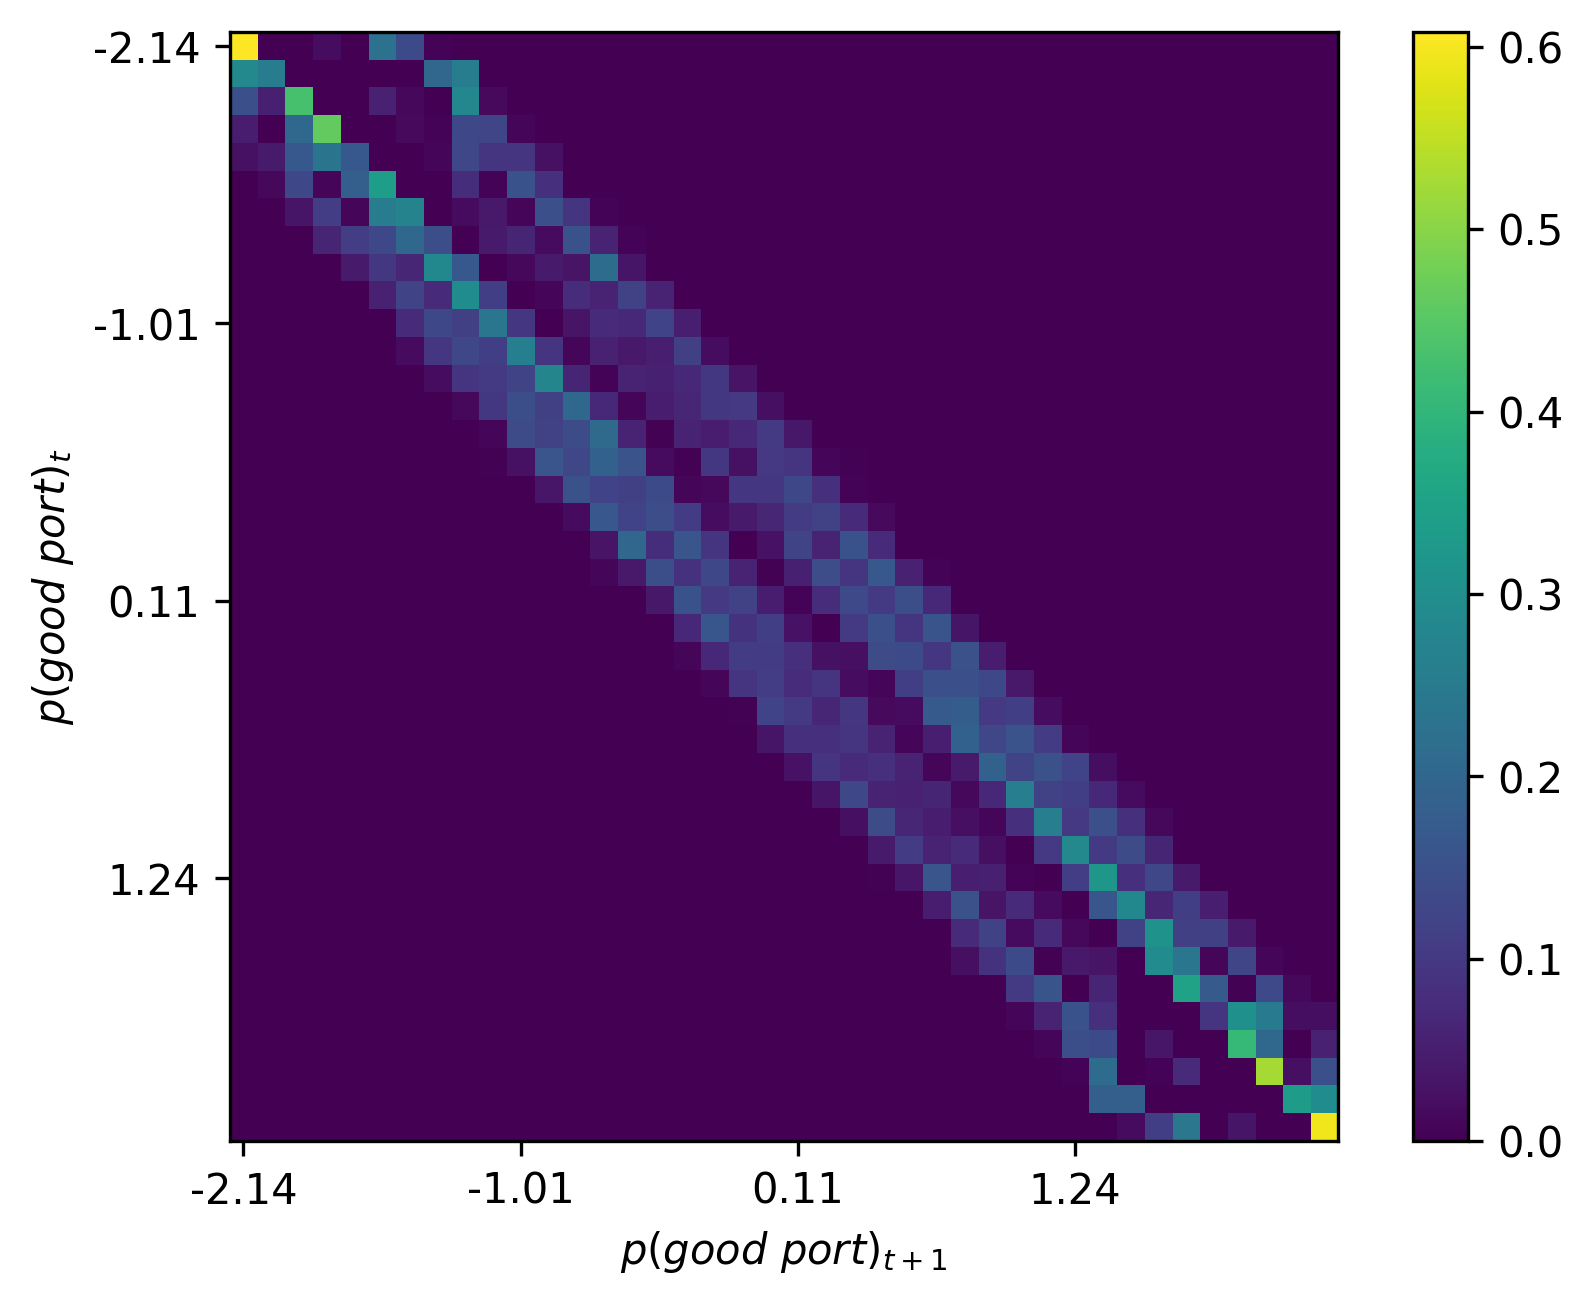

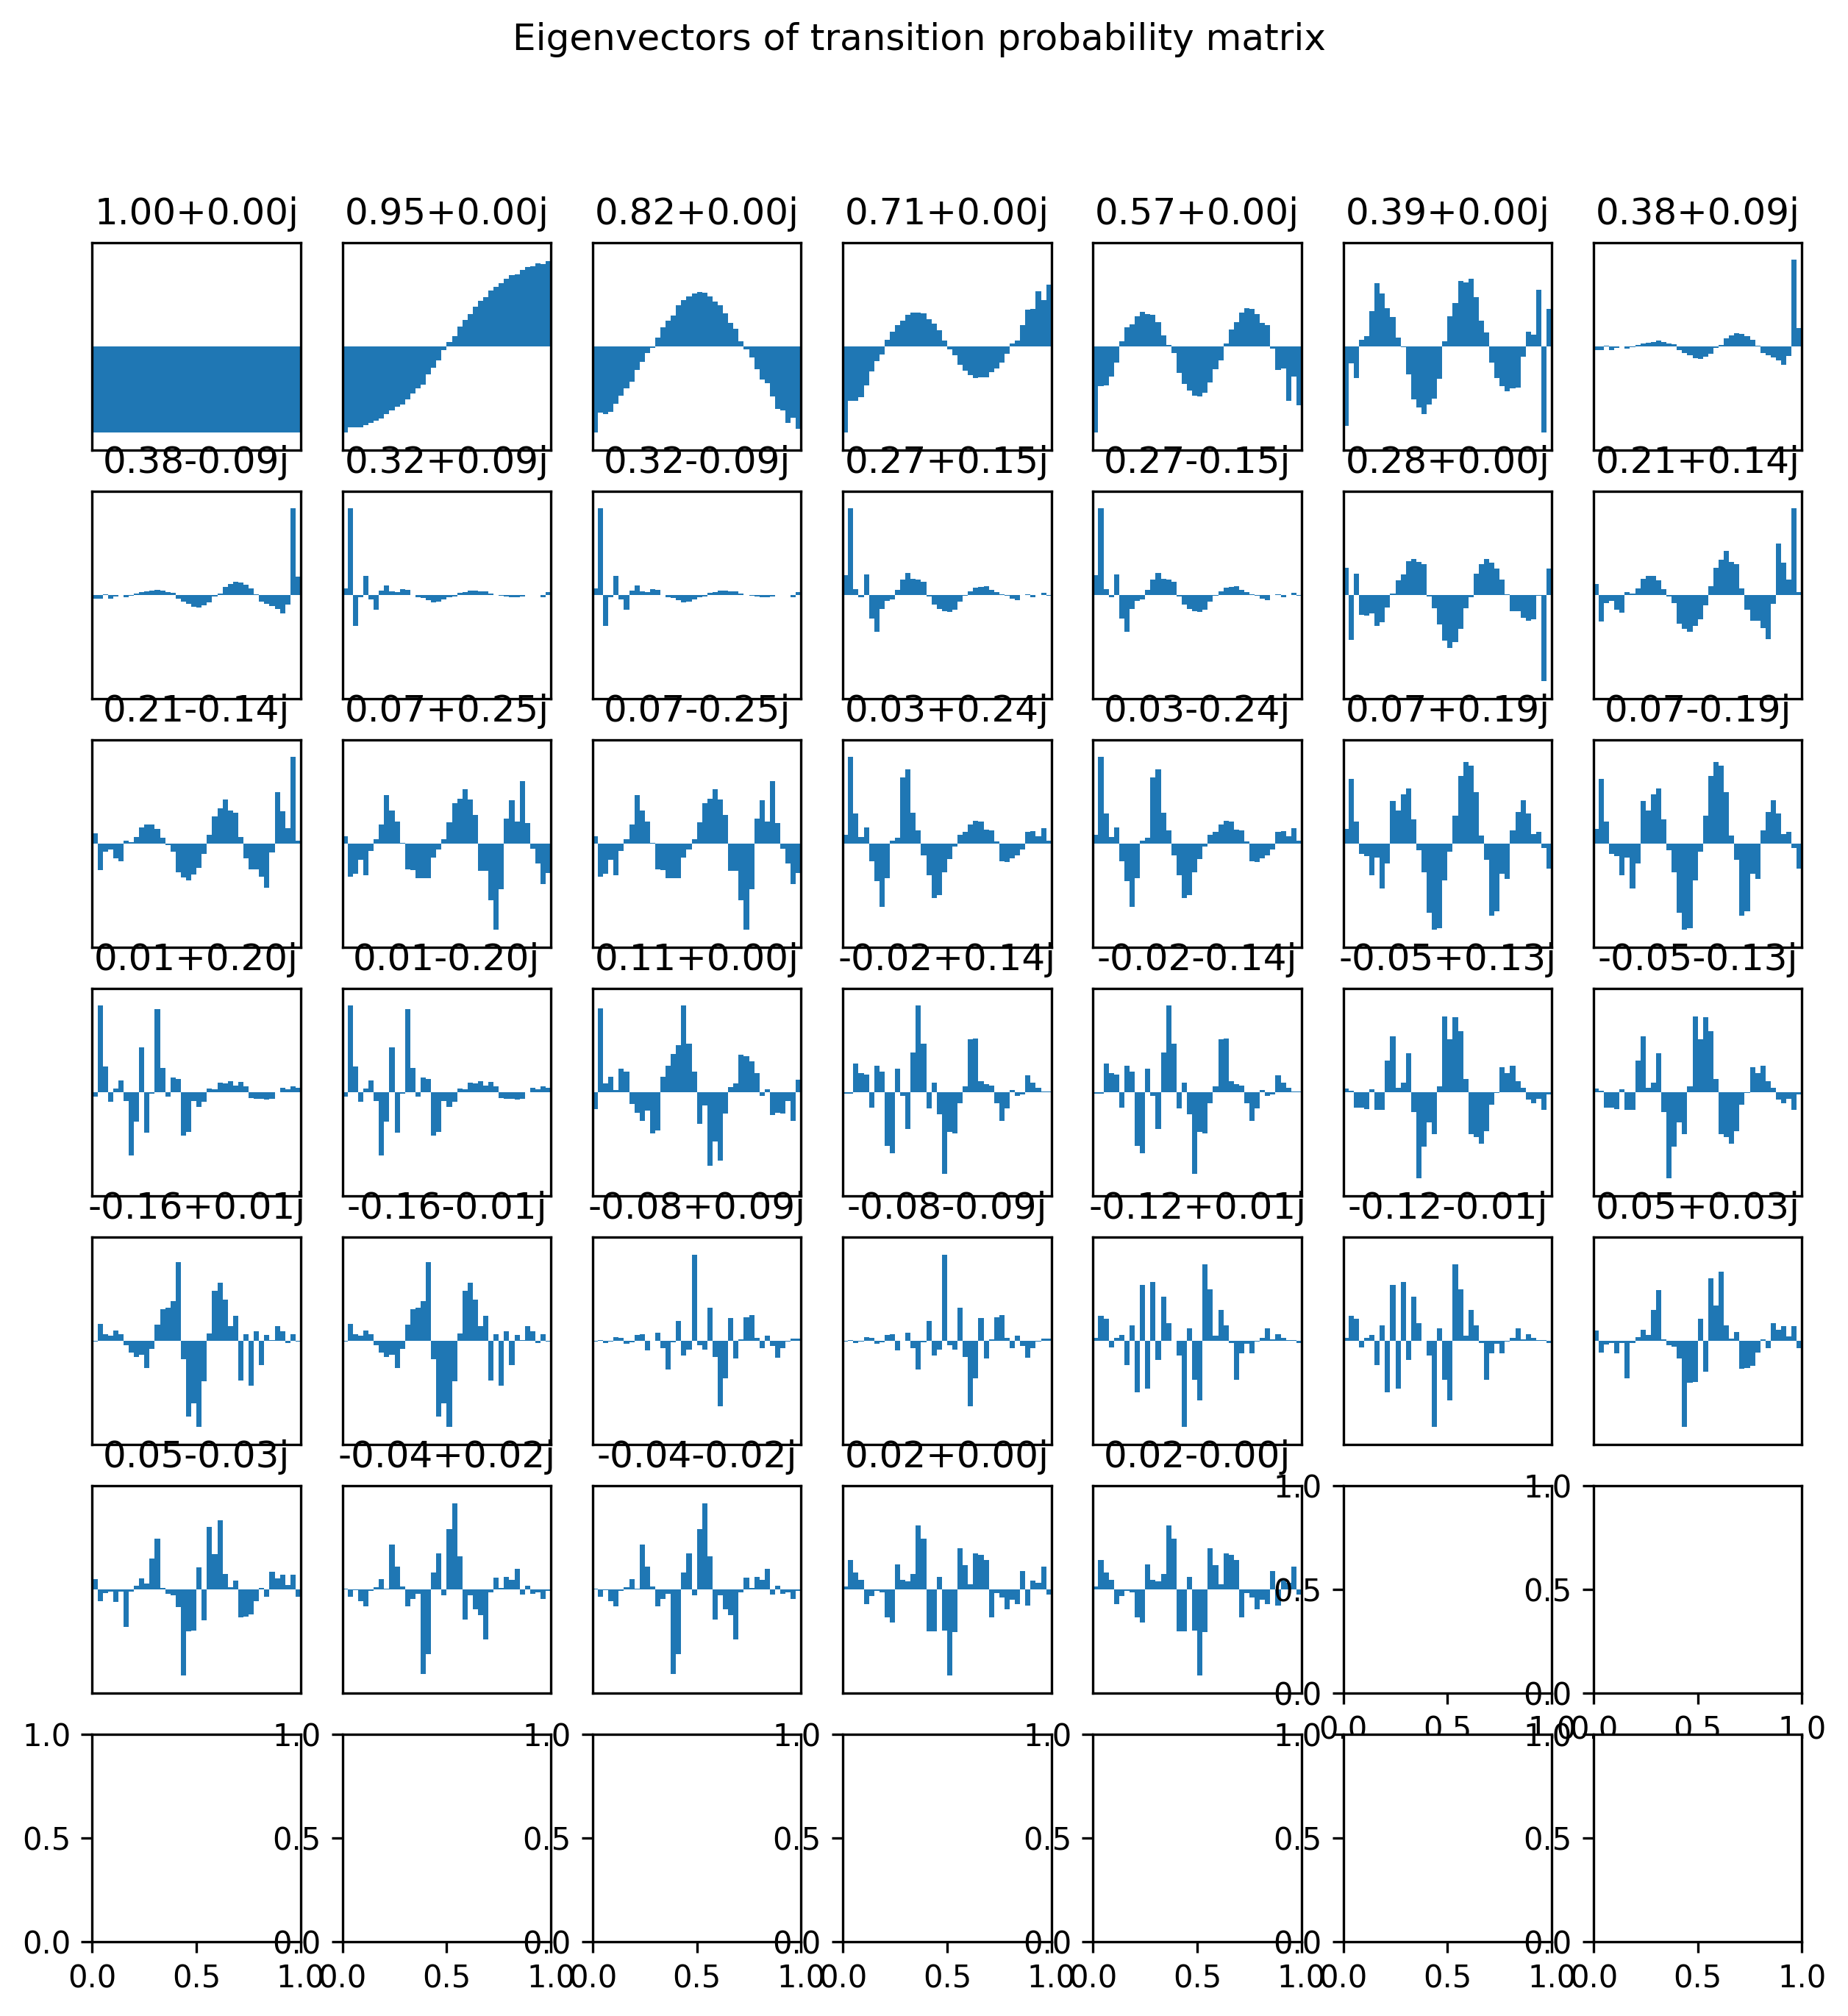

In [271]:
# how to get a transition matrix from this series of numbers?
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import logistic

use_tm = True
use_sig = False
fold = False

n_p_bins = 40

counts = []
for v in value_sessions:
    if use_sig: 
        belief = logistic.cdf(v)
        if fold: belief = 0.5 + np.abs(belief - 0.5)
        lims = [0, 1] if not fold else [0.5, 1]
        bin_edges = np.linspace(lims[0], lims[1], n_p_bins+1)[1:-1]  # Creates 5 edges for 4 bins
        bins = np.digitize(belief, bin_edges)
    else:
        if fold: v = np.abs(v)
        lims = [-np.max(np.abs(v)), np.max(np.abs(v))] if not fold else [0, np.max(np.abs(v))]
        bin_edges = np.linspace(lims[0], lims[1], n_p_bins+1)[1:-1]  # Creates 5 edges for 4 bins
        bins = np.digitize(v, bin_edges)

    # Number of unique states
    bins = bins.flatten()
    num_states = n_p_bins

    # Collect transitions
    rows = bins[:-1]; cols = bins[1:]
    print(np.max(rows), np.max(cols), num_states)
    # Count transitions using a sparse matrix
    count = csr_matrix((np.ones(len(rows)), (rows, cols)), shape=(num_states, num_states)).toarray()
    counts.append(count)
# Normalize to get probabilities
    
counts = np.sum(counts, axis=0)
transition_matrix = counts / counts.sum(axis=1, keepdims=True)
transition_matrix[np.isnan(transition_matrix)] = 0

M = transition_matrix if use_tm else counts
plt.figure(dpi=300)
plt.imshow(M)
plt.xticks(np.arange(0, n_p_bins, 10), [f'{b:.2f}' for b in bin_edges[::10]])
plt.yticks(np.arange(0, n_p_bins, 10), [f'{b:.2f}' for b in bin_edges[::10]])
plt.ylabel(r'$p(good\ port)_{t}$')
plt.xlabel(r'$p(good\ port)_{t+1}$')
# plt.xlim(lims); plt.ylim(lims)
plt.colorbar()

eigenvalues, eigenvectors = np.linalg.eig(M if use_tm else M / np.max(M))

print(eigenvectors.shape)
n = 49
fig, axes = plt.subplots(7,7, figsize=(10,10), dpi=300)
fig.suptitle('Eigenvectors of transition probability matrix' if use_tm else 'Eigenvectors of transition counts matrix')
for i, ax in enumerate(axes.flatten()):
    v = eigenvectors[:, i]
    ax.bar(np.arange(len(v)), v, width=1)
    ax.set_ylim([-1.2*np.max(np.abs(v)), 1.2*np.max(np.abs(v))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(f'{eigenvalues[i]:.2f}')
    ax.set_xlim([-0.5, n_p_bins-0.5])

plt.tight_layout()

In [7]:
np.save('./X.npy', np.array(X_sessions, dtype=object), allow_pickle=True)
np.save('./Y.npy', np.array(y_sessions, dtype=object), allow_pickle=True)

In [43]:
import sys
sys.path.append('/Users/jo/matching_pennies/src/glm-hmm/ssm/')
import os

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import ssm
from ssm.util import find_permutation

npr.seed(0)


In [44]:
X = np.load('./X.npy', allow_pickle=True)
Y = np.load('./Y.npy', allow_pickle=True)
# Y = [y[:, np.newaxis] for y in Y]


In [45]:
X_ = [x[:, [0,1,-1]] for x in X]
print([_.shape for _ in X_])

[(502, 3), (368, 3), (493, 3), (377, 3), (495, 3), (427, 3), (641, 3), (360, 3), (579, 3), (478, 3), (366, 3), (537, 3), (553, 3), (553, 3), (488, 3), (122, 3), (392, 3), (373, 3), (735, 3), (456, 3), (472, 3), (472, 3), (81, 3), (250, 3), (507, 3), (421, 3), (267, 3), (357, 3), (492, 3), (507, 3), (558, 3), (448, 3), (545, 3), (398, 3), (746, 3)]


In [46]:
# Set the parameters of the GLM-HMM
num_states = 2       # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim = X[0].shape[-1]         # input dimensions

# Make a GLM-HMM
# true_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
#                    observation_kwargs=dict(C=num_categories), transitions="standard")

new_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")

# Instantiate GLM-HMM and set prior hyperparameters
prior_sigma = 2
prior_alpha = 2
new_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
             observation_kwargs=dict(C=num_categories,prior_sigma=prior_sigma),
             transitions="sticky", transition_kwargs=dict(alpha=prior_alpha,kappa=0))

N_iters = 200 # maximum number of EM iterations. Fitting with stop earlier if increase in LL is below tolerance specified by tolerance parameter
fit_ll = new_glmhmm.fit(list(Y), inputs=list(X), method="em", num_iters=N_iters, tolerance=10**-1)

  0%|          | 0/200 [00:00<?, ?it/s]

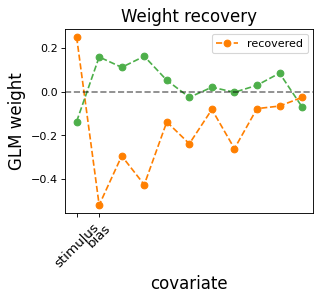

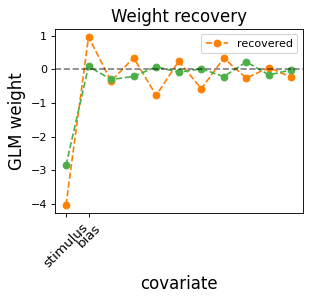

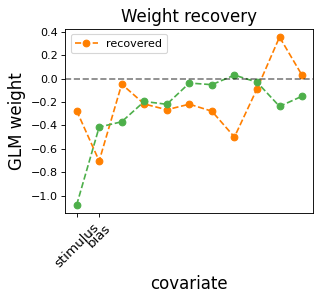

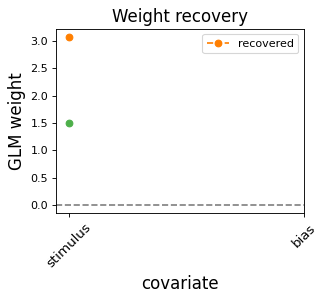

In [47]:
def split_weights(w, splits=[11,22,33]):
    weights_split = []
    for k in range(num_states):
        w_split = np.split(w[k][0], splits)
        weights_split.append(w_split)

    return weights_split

w = split_weights(new_glmhmm.observations.params)

for s in range(4):
    fig = plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
    cols = ['#ff7f00', '#4daf4a', '#377eb8']
    recovered_weights = new_glmhmm.observations.params
    for k in range(num_states):
        if k ==0:
            plt.plot(range(len(w[k][s])), w[k][s], color=cols[k],
                        lw=1.5,  label = "recovered", linestyle = '--', marker = 'o')
        else:
            plt.plot(range(len(w[k][s])), w[k][s], color=cols[k],
                        lw=1.5,  label = '', linestyle = '--', marker='o')
    plt.yticks(fontsize=10)
    plt.ylabel("GLM weight", fontsize=15)
    plt.xlabel("covariate", fontsize=15)
    plt.xticks([0, 1], ['stimulus', 'bias'], fontsize=12, rotation=45)
    plt.axhline(y=0, color="k", alpha=0.5, ls="--")
    plt.legend()
    plt.title("Weight recovery", fontsize=15)

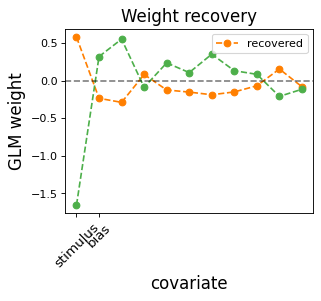

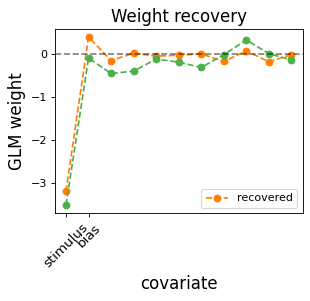

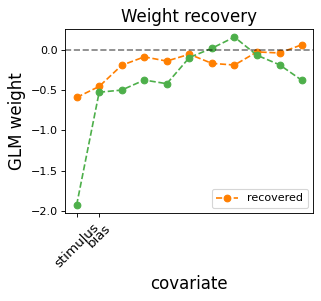

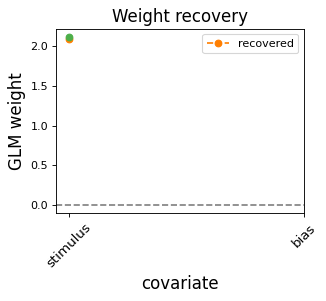

In [30]:
def split_weights(w, splits=[11,22,33]):
    weights_split = []
    for k in range(num_states):
        w_split = np.split(w[k][0], splits)
        weights_split.append(w_split)

    return weights_split

w = split_weights(new_glmhmm.observations.params)

for s in range(4):
    fig = plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
    cols = ['#ff7f00', '#4daf4a', '#377eb8']
    recovered_weights = new_glmhmm.observations.params
    for k in range(num_states):
        if k ==0:
            plt.plot(range(len(w[k][s])), w[k][s], color=cols[k],
                        lw=1.5,  label = "recovered", linestyle = '--', marker = 'o')
        else:
            plt.plot(range(len(w[k][s])), w[k][s], color=cols[k],
                        lw=1.5,  label = '', linestyle = '--', marker='o')
    plt.yticks(fontsize=10)
    plt.ylabel("GLM weight", fontsize=15)
    plt.xlabel("covariate", fontsize=15)
    plt.xticks([0, 1], ['stimulus', 'bias'], fontsize=12, rotation=45)
    plt.axhline(y=0, color="k", alpha=0.5, ls="--")
    plt.legend()
    plt.title("Weight recovery", fontsize=15)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

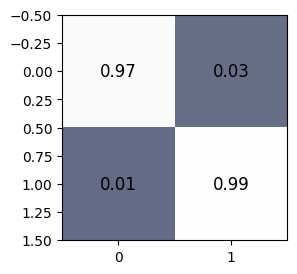

In [48]:
plt.subplot(1, 2, 2)
recovered_trans_mat = np.exp(new_glmhmm.transitions.log_Ps)
plt.imshow(recovered_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
for i in range(recovered_trans_mat.shape[0]):
    for j in range(recovered_trans_mat.shape[1]):
        text = plt.text(j, i, str(np.around(recovered_trans_mat[i, j], decimals=2)), ha="center", va="center",
                        color="k", fontsize=12)
plt.xlim(-0.5, num_states - 0.5)
plt.xticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.yticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.ylim(num_states - 0.5, -0.5)
plt.title("recovered", fontsize = 15)
plt.subplots_adjust(0, 0, 1, 1)

In [33]:
# Get expected states:
posterior_probs = [new_glmhmm.expected_states(data=data, input=inpt)[0]
                for data, inpt
                in zip(Y, X)]

Text(0, 0.5, 'p(state)')

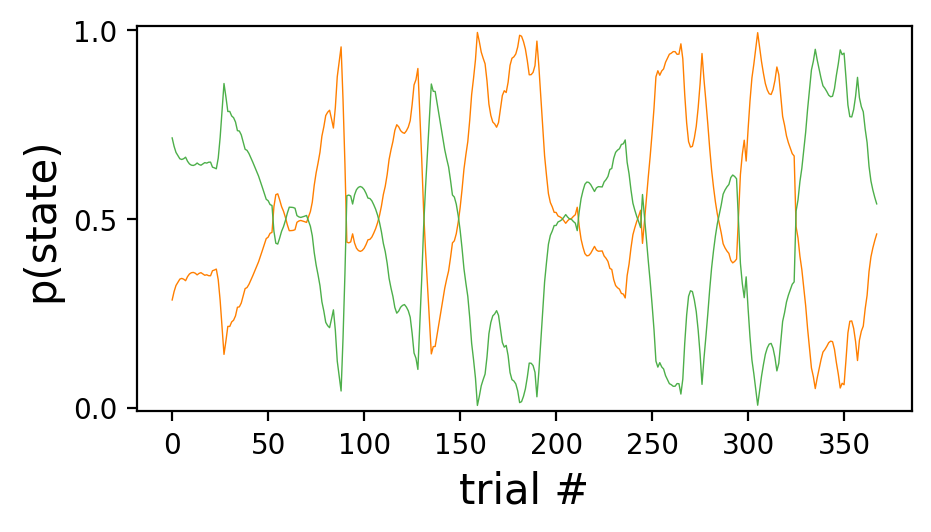

In [49]:
fig = plt.figure(figsize=(5, 2.5), dpi=200, facecolor='w', edgecolor='k')
sess_id = 1 #session id; can choose any index between 0 and num_sess-1
for k in range(num_states):
    plt.plot(posterior_probs[sess_id][:, k], label="State " + str(k + 1), lw=0.5,
             color=cols[k])
plt.ylim((-0.01, 1.01))
plt.yticks([0, 0.5, 1], fontsize = 10)
plt.xlabel("trial #", fontsize = 15)
plt.ylabel("p(state)", fontsize = 15)

In [ ]:
np.save('./P.npy', np.array(posterior_probs, dtype=object), allow_pickle=True)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

num_states = 2
cols = ['b', 'r']
posterior_probs = np.load('./P.npy', allow_pickle=True)

def session_plot_moving_average(session_id, sessions, posterior_probs):
    '''Plot reward probabilities and moving average of choices for a single session, Figure 1D'''
    
    session = sessions[session_id]
    # extract trial data (choices, rewards, states)
    block = session.trial_data['block']; choices = session.trial_data['choices']; n_trials = session.trial_data['n_trials']
    outcome = session.trial_data['outcomes']; state = session.trial_data['state'];  forced_trials = session.trial_data['forced_trial']
    forced_array = np.where(forced_trials == 1)[0]; forced_trials_sum = sum(forced_trials)

    # exclude without forced trials 
    choices = np.delete(choices, forced_array); block = np.delete(block, forced_array)
    n_trials = n_trials - forced_trials_sum; outcome =  np.delete(outcome, forced_array);  state =  np.delete(state, forced_array)

    plt.figure(figsize = [8,5], dpi=200)
    # plt.subplot(4,1,1);  plt.plot(choices, color = 'black'); plt.xlim(1,n_trials) # plot choices
    # plt.yticks([0,1],['B', 'A']);  plt.ylabel('Choice')
    # plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False); 

    plt.subplot(4,1,1);  plt.plot(state, color = 'lightblue') # plot state
    plt.xlim(1,n_trials); plt.yticks([0,1],['B','A']);  plt.ylabel('State')
    plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False); 

    plt.subplot(4,1,2);  
    for k in range(num_states):
        plt.plot(posterior_probs[session_id][:, k], label="State " + str(k + 1), lw=0.5,
                color=cols[k])
    plt.xlim(1,n_trials); plt.yticks([0,1],['B','A']);  plt.ylabel('State')
    plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False); 
        
sess_id = 13 #session id; can choose any index between 0 and num_sess-1

session_plot_moving_average(-2, exp_rec[0].sessions, posterior_probs)
